In [2]:
import sys
import os
import subprocess
import statistics
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def set_param(imgfile,sigma,sigma_r,kappa,blocks_per_line):
    param_file = open('../parameters.txt',"w");
    print('image',imgfilename,file = param_file);
    print('sigma',sigma,file = param_file);
    print('sigmar',sigma_r,file = param_file);
    print('kappa',kappa,file = param_file);
    print('blocks_per_line',blocks_per_line,file = param_file);
    param_file.close();
    return

def concat_values5_compare(x,y,z,w,v):
    cmd = "../Kappa_compare_A_and_D/main "+str(x)+" "+str(y)+" "+str(z)+" "+str(w)+" "+str(v);
   
    return cmd


In [3]:
MSE1list = []; #lista 50,50
MSE2list = []; # 200,100
MSE3list = []; # 200,200

for i in range(20):
    imgfilename = "kodak" + str(i+1) + ".jpg";
    #SET KAPPA RANGE
    kappa_begin = 0;
    kappa_step = 0.5;
    kappa_end =3;
    set_param(imgfilename,0,0,0,0);

    ##FIRST COMPUTATION
    #SET PARAMETERS
    sigma = 50;
    sigma_r = 50;
    #COMPUTE MSE
    cmd = concat_values5_compare(kappa_begin,kappa_end,kappa_step,sigma,sigma_r);
    subprocess.run(cmd,shell=True)
    MSE1 = pd.read_csv('../Kappa_compare_A_and_D/MSE.tsv',sep ='\t');
    MSE1list.append(MSE1);

    ##SECOND COMPUTATION
    #SET PARAMETERS
    sigma = 200;
    sigma_r = 100;
    #COMPUTE MSE
    cmd = concat_values5_compare(kappa_begin,kappa_end,kappa_step,sigma,sigma_r);
    subprocess.run(cmd,shell=True)
    MSE2 = pd.read_csv('../Kappa_compare_A_and_D/MSE.tsv',sep ='\t');
    MSE2list.append(MSE2);
    
    ##THIRD COMPUTATION
    #SET PARAMETERS
    sigma = 200;
    sigma_r = 200;
    #COMPUTE MSE
    cmd = concat_values5_compare(kappa_begin,kappa_end,kappa_step,sigma,sigma_r);
    subprocess.run(cmd,shell=True)
    MSE3 = pd.read_csv('../Kappa_compare_A_and_D/MSE.tsv',sep ='\t');
    MSE3list.append(MSE3);

    ##PLOT
    #ax = MSE1.plot(x = MSE1.columns.values[0], y = MSE1.columns.values[1],style = '-.',marker = 'o');
    #ax.set_ylabel('MSE')
    #MSE2.plot(ax=ax, x = MSE2.columns.values[0], y = MSE2.columns.values[1],style = '-.',marker = 'x')
    #MSE3.plot(ax=ax, x = MSE3.columns.values[0], y = MSE3.columns.values[1],style = '-.',marker = 'v')

    #save plot
    #ax.figure.savefig('../measures/mseimg2.pdf')
    
print('Computation done')


Computation done


# Plot results

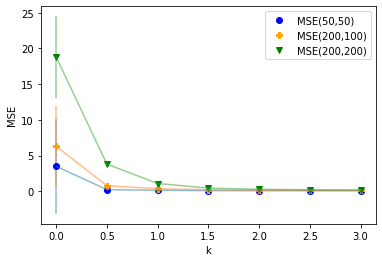

In [4]:

#COMPUTE DEVIATION AND MEAN:
imax = 2;
##FIRST COMPUTATION
dev1 = [];
avg1 = [];

kvalues = list(MSE1.iloc[:,0].values);
for i in range(MSE1.shape[0]):
    samples=[];
    for j in range(imax):
        samples.append(MSE1list[j].iloc[i,1]);
    dev1.append(statistics.stdev(samples));
    avg1.append(statistics.mean(samples));

    ##SECOND COMPUTATION
dev2 = [];
avg2 = [];
kvalues = list(MSE2.iloc[:,0].values);
for i in range(MSE2.shape[0]):
    samples=[];
    for j in range(imax):
        samples.append(MSE2list[j].iloc[i,1]);
    dev2.append(statistics.stdev(samples));
    avg2.append(statistics.mean(samples));
    
    ##THIRD COMPUTATION
dev3 = [];
avg3 = [];
kvalues = list(MSE3.iloc[:,0].values);
for i in range(MSE3.shape[0]):
    samples=[];
    for j in range(imax):
        samples.append(MSE3list[j].iloc[i,1]);
    dev3.append(statistics.stdev(samples));
    avg3.append(statistics.mean(samples));


data1 = list(zip(kvalues,avg1))
frame1 = pd.DataFrame(data1,columns = ['k','MSE(50,50)']);
data2 = list(zip(kvalues,avg2))
frame2 = pd.DataFrame(data2,columns = ['k','MSE(200,100)']);
data3 = list(zip(kvalues,avg3))
frame3 = pd.DataFrame(data3,columns = ['k','MSE(200,200)']);

##PLOT with 99 certainty interval
ax = frame1.plot(x = frame1.columns.values[0], y = frame1.columns.values[1],style = '-.',marker = 'o', c ='b', ls='none');
ax.set_ylabel('MSE')
frame2.plot(ax=ax, x = frame2.columns.values[0], y = frame2.columns.values[1],style = '-.',marker = 'P', c = 'orange', ls='none')
frame3.plot(ax=ax, x = frame3.columns.values[0], y = frame3.columns.values[1],style = '-.',marker = 'v', c = 'green', ls='none')

ax.errorbar(np.array(kvalues), np.array(avg1), yerr=3*np.array(dev1), alpha = 0.5)
ax.errorbar(np.array(kvalues), np.array(avg2), yerr=3*np.array(dev2), alpha = 0.5)
ax.errorbar(np.array(kvalues), np.array(avg3), yerr=3*np.array(dev2), alpha = 0.5)

#save plot
ax.figure.savefig('../measures/msekodak95_cert.pdf')